## What is CatBoost?
- CatBoost is a machine learning algorithm from Yandex (a Russian tech company), designed specifically for gradient boosting on decision trees, with special emphasis on:


    - Categorical data handling
    - High performance out-of-the-box
    - Reduced need for preprocessing


- The name "CatBoost" stands for Categorical Boosting, indicating its core strength: working with categorical features without manual encoding.

### Advantages of CatBoost
**1. Native Categorical Feature Support**
- Most ML models require one-hot encoding or label encoding for categorical variables.
- CatBoost automatically handles categorical variables by transforming them into numbers using statistics from the data (like target encoding), while avoiding overfitting.

**2. Minimal Preprocessing**
- No need to scale features (like in SVM or linear regression).
- Automatically deals with missing values, categorical variables, and outliers well.

**3. Avoids Overfitting with Ordered Boosting**
- Uses a technique called Ordered Boosting to prevent information leakage when creating decision splits, especially during categorical encoding.
- This leads to more reliable and stable models, especially for small or imbalanced datasets.

**4. Fast and Efficient**
- Offers CPU and GPU support, making it faster than other tree-based models like XGBoost and LightGBM in many cases.
- Multithreading is well-optimized for faster training.

**5. Great Out-of-the-Box Performance**
- Requires less hyperparameter tuning to perform well.
- Even with default settings, CatBoost often achieves competitive results.

**6. Robust to Overfitting**
- Due to ordered boosting and smart default regularization, it often generalizes better to unseen data.

**7. Built-in Tools**
- Built-in tools for:
        - Feature importance
        - Cross-validation
        - Model interpretation
        - Snapshot saving for training recovery

### How CatBoost Works (Under the Hood)
**➤ 1. Gradient Boosting**
- CatBoost is based on the gradient boosting principle, just like XGBoost and LightGBM. This means it builds models in a stage-wise fashion, where each model corrects the mistakes of the previous one.

**➤ 2. Handling Categorical Features with Statistics**
- Instead of using label encoding or one-hot encoding, CatBoost does something smarter:
    - It computes target statistics (like mean target value) per category but in an order that avoids leakage.
    - For each row, it uses only the data seen before that row to compute this statistic (called ordered target encoding).

- This way:

    - The encoding remains faithful to how the model would generalize to unseen data.
    - Overfitting is reduced, especially when you have high-cardinality categorical features.

**➤ 3. Symmetric Trees** 
- Unlike LightGBM, which grows trees leaf-wise, CatBoost grows symmetric trees (balanced trees where splits happen at the same level).
- Pros: Faster inference time, more efficient use of CPU/GPU
- Cons: Might need slightly more iterations to reach optimal accuracy

**➤ 4. Ordered Boosting**
- A key innovation in CatBoost, ordered boosting, ensures that:
- Training data is processed in a sequential manner.
- At each iteration, only past data is used to calculate target statistics for categorical features.
- This avoids the target leakage problem common in naïve target encoding.

### When Should You Use CatBoost?

Use **CatBoost** when:

| **Situation**                             | **Why CatBoost is a Good Fit**                                          |
|------------------------------------------|-------------------------------------------------------------------------|
| Your data has categorical variables      | No manual encoding needed                                               |
| You want high accuracy with less tuning  | Performs well out-of-the-box                                            |
| You want to prevent overfitting          | Ordered boosting helps                                                  |
| You're working on tabular data           | Specialized for tabular ML problems                                     |
| Your dataset has missing values          | CatBoost handles them natively                                          |
| You want fast training & prediction      | Efficient multi-core and GPU support                                    |
| You prefer easy model interpretation     | Built-in tools like feature importance and visualizations               |

### Comparison: Decision Tree vs Random Forest vs XGBoost vs LightGBM vs CatBoost

| **Feature / Aspect**               | **Decision Tree 🌳**         | **Random Forest 🌲🌲**       | **XGBoost 🚀**             | **LightGBM 💡**           | **CatBoost 🐈‍⬛**          |
|-----------------------------------|------------------------------|------------------------------|----------------------------|----------------------------|----------------------------|
| **Type**                          | Tree-based                   | Ensemble (Bagging)           | Ensemble (Boosting)        | Ensemble (Boosting)        | Ensemble (Boosting)        |
| **Boosting**                      | ❌ No                        | ❌ No                        | ✅ Gradient Boosting       | ✅ Gradient Boosting       | ✅ Ordered Boosting        |
| **Bagging**                       | ❌ No                        | ✅ Yes                       | ❌ No                      | ❌ No                      | ❌ No                      |
| **Accuracy (general)**           | ❌ Low                       | ✅ Good                      | ✅✅ Excellent              | ✅✅ Excellent              | ✅✅ Excellent              |
| **Speed (Training)**             | ✅ Fast                      | ⚠️ Slower (many trees)      | ⚠️ Medium                  | ✅ Very Fast               | ✅ Fast (CPU & GPU)        |
| **Speed (Prediction)**           | ✅ Fast                      | ⚠️ Medium                   | ⚠️ Medium                  | ✅ Fast                    | ✅ Fast                    |
| **Overfitting**                  | ❌ High risk                 | ✅ Lower than DT             | ✅ Lower                   | ✅ Lower                   | ✅ Very Low (ordered boost)|
| **Handles Categorical Features** | ❌ Manual encoding needed    | ❌ Manual encoding needed    | ❌ Manual encoding needed  | ⚠️ Basic support           | ✅ Native support          |
| **Handles Missing Values**       | ❌ No                        | ✅ Partial                   | ✅ Yes                     | ✅ Yes                     | ✅ Yes                     |
| **Feature Importance**           | ✅ Yes                       | ✅ Yes                       | ✅ Yes                     | ✅ Yes                     | ✅ Yes (more interpretable)|
| **Hyperparameter Tuning**        | ❌ Minimal                   | ⚠️ Some                     | ✅ Yes                     | ✅ Yes                     | ❌ Minimal                 |
| **Interpretability**             | ✅ Easy to understand        | ⚠️ Harder (many trees)      | ⚠️ Medium                  | ⚠️ Medium                  | ⚠️ Medium                  |
| **Memory Usage**                 | ✅ Low                       | ⚠️ High                     | ⚠️ Medium                  | ✅ Lower than XGB          | ✅ Optimized               |
| **Parallel Processing**          | ❌ No                        | ✅ Yes                       | ✅ Yes                     | ✅ Yes                     | ✅ Yes                     |
| **GPU Support**                  | ❌ No                        | ❌ Limited                  | ✅ Yes                     | ✅ Yes                     | ✅ Yes                     |
| **Best Use Cases**               | Simple models, easy logic    | Strong baseline, general tasks | High performance tabular | Large datasets, speed      | Categorical-heavy, robust |

In [1]:
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shivamb/real-or-fake-fake-jobposting-prediction")
print("Path to dataset files:", path)

100%|█████████████████████████████████████████████████████████████████████████████| 16.1M/16.1M [03:14<00:00, 86.9kB/s]

Extracting files...


Path to dataset files: C:\Users\hp\.cache\kagglehub\datasets\shivamb\real-or-fake-fake-jobposting-prediction\versions\1


In [24]:
# Load the dataset

file_path = r"C:\Users\hp\.cache\kagglehub\datasets\shivamb\real-or-fake-fake-jobposting-prediction\versions\1\fake_job_postings.csv"

df = pd.read_csv(file_path)

# Display the first few rows
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [25]:
df.shape

(17880, 18)

In [27]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [28]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

##### Data Cleaning

In [29]:
# 1. Drop 'job_id'
df.drop(columns=['job_id'], inplace=True)

# 2. Fill missing categorical fields
df['location'] = df['location'].fillna('Unknown')
df['department'] = df['department'].fillna('Missing')
df['employment_type'] = df['employment_type'].fillna('Other')
df['required_experience'] = df['required_experience'].fillna('Not Specified')
df['required_education'] = df['required_education'].fillna('Not Specified')
df['industry'] = df['industry'].fillna('Other')
df['function'] = df['function'].fillna('Other')

# 3. Fill missing text fields
df['company_profile'] = df['company_profile'].fillna('Not Provided')
df['description'] = df['description'].fillna('Missing')
df['requirements'] = df['requirements'].fillna('')
df['benefits'] = df['benefits'].fillna('')

# 4. Optionally parse 'salary_range' into numeric columns (min and max)
def parse_salary_range(s):
    try:
        if pd.isna(s):
            return None
        parts = s.split('-')
        return (float(parts[0]), float(parts[1]))
    except:
        return None

salary_ranges = df['salary_range'].apply(parse_salary_range)
df['salary_min'] = salary_ranges.apply(lambda x: x[0] if x else None)
df['salary_max'] = salary_ranges.apply(lambda x: x[1] if x else None)

# Fill the new salary fields with median values
df['salary_min'].fillna(df['salary_min'].median(), inplace=True)
df['salary_max'].fillna(df['salary_max'].median(), inplace=True)

# Drop original 'salary_range' column
df.drop(columns=['salary_range'], inplace=True)

# 5. Ensure all categorical columns are strings (important for CatBoost)
categorical_cols = ['title', 'location', 'department', 'employment_type',
                    'required_experience', 'required_education', 'industry', 'function']
df[categorical_cols] = df[categorical_cols].astype(str)

# Final check for missing values
missing_after = df.isnull().sum()
print("Remaining Missing Values (Should be 0):\n", missing_after)

Remaining Missing Values (Should be 0):
 title                  0
location               0
department             0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
salary_min             0
salary_max             0
dtype: int64


In [30]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                17880 non-null  object 
 1   location             17880 non-null  object 
 2   department           17880 non-null  object 
 3   company_profile      17880 non-null  object 
 4   description          17880 non-null  object 
 5   requirements         17880 non-null  object 
 6   benefits             17880 non-null  object 
 7   telecommuting        17880 non-null  int64  
 8   has_company_logo     17880 non-null  int64  
 9   has_questions        17880 non-null  int64  
 10  employment_type      17880 non-null  object 
 11  required_experience  17880 non-null  object 
 12  required_education   17880 non-null  object 
 13  industry             17880 non-null  object 
 14  function             17880 non-null  object 
 15  fraudulent           17880 non-null 

In [31]:
# Summary statistics
df.describe(include='all')

,title,location,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,salary_min,salary_max
count,17880,17880,17880,17880,17880,17880,17880,17880.000000,17880.000000,17880.000000,17880,17880,17880,17880,17880,17880.000000,1.788000e+04,1.788000e+04
unique,11231,3106,1338,1710,14802,11968,6205,NaN,NaN,NaN,5,8,14,132,37,NaN,NaN,NaN
top,English Teacher Abroad,"GB, LND, London",Missing,Not Provided,"Play with kids, get paid for it Love travel? J...",,,NaN,NaN,NaN,Full-time,Not Specified,Not Specified,Other,Other,NaN,NaN,NaN
freq,311,718,11547,3308,379,2696,7212,NaN,NaN,NaN,11620,7050,8105,4903,6780,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042897,0.795302,0.491723,NaN,NaN,NaN,NaN,NaN,0.048434,1.113602e+05,1.711670e+05
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.202631,0.403492,0.499945,NaN,NaN,NaN,NaN,NaN,0.214688,7.055101e+06,1.078743e+07
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,3.500000e+04,5.000000e+04
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,3.500000e+04,5.000000e+04
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,3.500000e+04,5.000000e+04


C:\Users\hp\AppData\Local\Temp\ipykernel_16432\2478774283.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='fraudulent', palette=colors)


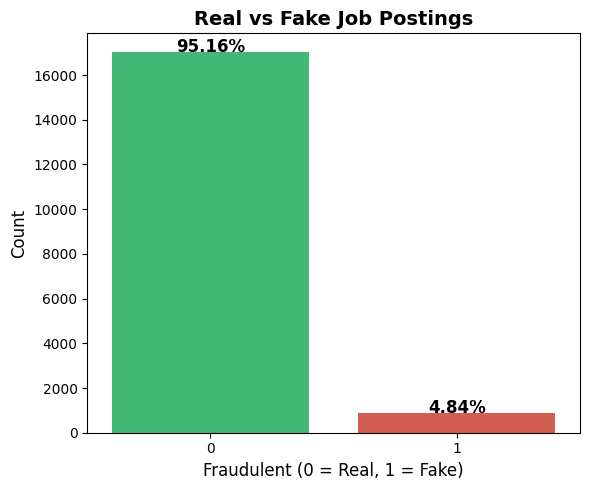

In [36]:
# Calculate value counts and percentages
count_data = df['fraudulent'].value_counts()
percentages = df['fraudulent'].value_counts(normalize=True) * 100

# Set color palette
colors = ['#2ecc71', '#e74c3c']  # Green for real, red for fake

# Create countplot
plt.figure(figsize=(6, 5))
ax = sns.countplot(data=df, x='fraudulent', palette=colors)

# Add percentage text above bars
for i, val in enumerate(count_data):
    percent = percentages[i]
    ax.text(i, val + 20, f"{percent:.2f}%", ha='center', fontsize=12, fontweight='bold')

# Customize labels and title
plt.title("Real vs Fake Job Postings", fontsize=14, fontweight='bold')
plt.xlabel("Fraudulent (0 = Real, 1 = Fake)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.tight_layout()
plt.show()

#### Split Features and Target

In [38]:
from sklearn.model_selection import train_test_split

# Target variable
y = df['fraudulent']

# Feature set
X = df.drop(columns=['fraudulent'])

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

#### Identify Categorical Features

In [39]:
# List of categorical column names
categorical_cols = ['title', 'location', 'department', 'employment_type',
                    'required_experience', 'required_education', 'industry', 'function']

# Get column indices for CatBoost
cat_features_indices = [X.columns.get_loc(col) for col in categorical_cols]

In [47]:
!pip install catboost

  Using cached catboost-1.2.8-cp310-cp310-win_amd64.whl.metadata (1.5 kB)
   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.5/102.5 MB 730.2 kB/s eta 0:02:20
   ---------------------------------------- 0.5/102.5 MB 730.2 kB/s eta 0:02:20
   ---------------------------------------- 0.8/102.5 MB 763.2 kB/s eta 0:02:14
   ---------------------------------------- 0.8/102.5 MB 763.2 kB/s eta 0:02:14
   ---------------------------------------- 1.0/102.5 MB 653.7 kB/s eta 0:02:36
   ---------------------------------------- 1.0/102.5 MB 653.7 kB/s eta 0:02:36
    --------------------------------------- 1.3/102.5 MB 692.1 kB/s eta 0:02:27
    -------


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: C:\Users\hp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


   ------ -------------------------------- 16.0/102.5 MB 688.1 kB/s eta 0:02:06
   ------ -------------------------------- 16.3/102.5 MB 686.4 kB/s eta 0:02:06
   ------ -------------------------------- 16.5/102.5 MB 688.9 kB/s eta 0:02:05
   ------ -------------------------------- 16.8/102.5 MB 692.2 kB/s eta 0:02:04
   ------ -------------------------------- 17.0/102.5 MB 696.8 kB/s eta 0:02:03
   ------ -------------------------------- 17.3/102.5 MB 700.0 kB/s eta 0:02:02
   ------ -------------------------------- 17.3/102.5 MB 700.0 kB/s eta 0:02:02
   ------ -------------------------------- 17.6/102.5 MB 703.1 kB/s eta 0:02:01
   ------ -------------------------------- 17.6/102.5 MB 703.1 kB/s eta 0:02:01
   ------ -------------------------------- 17.8/102.5 MB 699.5 kB/s eta 0:02:02
   ------ -------------------------------- 17.8/102.5 MB 699.5 kB/s eta 0:02:02
   ------ -------------------------------- 18.1/102.5 MB 696.5 kB/s eta 0:02:02
   ------ ------------------------------

#### Train CatBoostClassifier

In [49]:
# Define text columns
text_features = ['company_profile', 'description', 'requirements', 'benefits']

# Recreate train/test splits
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Define CatBoost column indices
cat_features_indices = [X.columns.get_loc(col) for col in categorical_cols]
text_features_indices = [X.columns.get_loc(col) for col in text_features]

# Initialize CatBoost with text + cat support
cat_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    loss_function='Logloss',
    eval_metric='F1',
    cat_features=cat_features_indices,
    text_features=text_features_indices,
    verbose=100,
    random_seed=42
)

# Train the model
cat_model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50)

0:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 1.56s	remaining: 25m 58s
100:	learn: 0.7924528	test: 0.8361204	best: 0.8361204 (100)	total: 1m 55s	remaining: 17m 7s
200:	learn: 0.8722892	test: 0.8514851	best: 0.8580858 (176)	total: 3m 30s	remaining: 13m 56s
300:	learn: 0.9136187	test: 0.8709677	best: 0.8709677 (276)	total: 5m 7s	remaining: 11m 54s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.8745980707
bestIteration = 324

Shrink model to first 325 iterations.


#### Make Predictions and Evaluate

In [50]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Predict on test set
y_pred = cat_model.predict(X_test)

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC AUC Score
y_pred_proba = cat_model.predict_proba(X_test)[:, 1]
print("\nROC AUC Score:", roc_auc_score(y_test, y_pred_proba))


Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      3403
           1       0.99      0.79      0.87       173

    accuracy                           0.99      3576
   macro avg       0.99      0.89      0.93      3576
weighted avg       0.99      0.99      0.99      3576


Confusion Matrix:
 [[3401    2]
 [  37  136]]

ROC AUC Score: 0.9933686529566738


##### Plot feature importance:

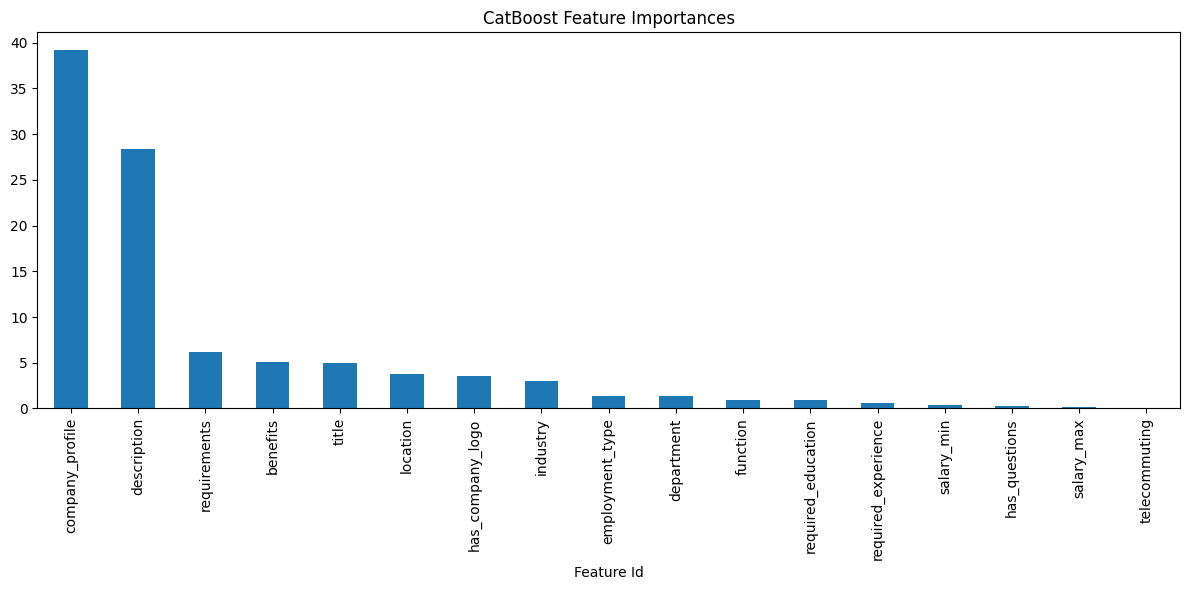

In [52]:
feature_importances = cat_model.get_feature_importance(prettified=True)
feature_importances.plot(kind='bar', x='Feature Id', y='Importances', figsize=(12, 6), legend=False)
plt.title('CatBoost Feature Importances')
plt.tight_layout()
plt.show()